# Page Hopping

In [169]:
import networkx as nx  
import matplotlib.pyplot as plt
class Graph(object):
     
    def __init__(self,links_line):
        self.sumLengths=0
        self.graph_dict=dict()
        array=links_line.split(" ")
        i=0
        while int(array[i])+int(array[i+1])>0:
            self.addLink((array[i],array[i+1]))
            i=i+2
        print(self.graph_dict)
        G=nx.DiGraph()
        for page in self.graph_dict.keys():
            G.add_node(page)
        for (page1,page2) in self.links():
            G.add_edge(page1, page2)
        nx.draw(G, with_labels=True, font_weight='bold')
        plt.show()
            
    def addLink(self,tuple_link):
        (page1,page2)=tuple_link
        if page1 not in self.graph_dict.keys():
            self.graph_dict[page1]=[page2]
        else:
            self.graph_dict[page1].append(page2) 
            
            
    def pages(self):
        return list(self.graph_dict.keys())
    
    
    def links(self):
        links = []
        for key in self.graph_dict.keys():
            for page in self.graph_dict[key]:
                    links.append((key, page))
        return links
                                  
            
    def find_all_paths(self, start_page, end_page, path=[]):
        path = path + [start_page]
        if start_page == end_page:
            return [path]
        paths=[]
        for page in self.graph_dict[start_page]:
            if page not in path:
                extended_paths = self.find_all_paths(page,end_page,path)
                if extended_paths is not None:
                    for p in extended_paths:
                        paths.append(p)
        return paths
    
    
    def minPath(self, start_page, end_page):
        paths=self.find_all_paths(start_page, end_page, path=[])
        smallest = sorted(paths, key=len)[0]
        return smallest
    
    def sumOfAllPathLengths(self):
        s=0;
        for keyi in self.graph_dict.keys():
            for keyj in self.graph_dict.keys():
                if keyi != keyj:
                    print(keyi+"-->"+keyj+":All paths are:",end=" "),print(self.find_all_paths(keyi,keyj),end=" =>")
                    print("min path is:",end=" ")
                    minpath=self.minPath(keyi,keyj)
                    print(minpath)
                    pathLength=len(minpath)-1
                    print("So path length: "+str(pathLength))
                    s=s+pathLength
        print("sum of all path lengths:"+str(s))
        self.sumLengths=s
        return s   

    def possiblePairesOfPages(self):#N*(N-1)
        return len(self.graph_dict.keys())*(len(self.graph_dict.keys())-1)
    
    def averagePathLength(self):
        return format(self.sumLengths/self.possiblePairesOfPages(), '.3f')
    
        

{'1': ['2', '3'], '2': ['4'], '3': ['1'], '4': ['3']}


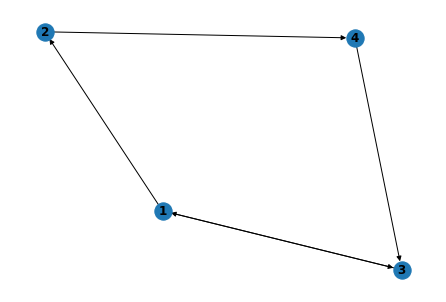

In [170]:
graph1 = Graph("1 2 2 4 1 3 3 1 4 3 0 0")

In [171]:
graph1.sumOfAllPathLengths()

1-->2:All paths are: [['1', '2']] =>min path is: ['1', '2']
So path length: 1
1-->3:All paths are: [['1', '2', '4', '3'], ['1', '3']] =>min path is: ['1', '3']
So path length: 1
1-->4:All paths are: [['1', '2', '4']] =>min path is: ['1', '2', '4']
So path length: 2
2-->1:All paths are: [['2', '4', '3', '1']] =>min path is: ['2', '4', '3', '1']
So path length: 3
2-->3:All paths are: [['2', '4', '3']] =>min path is: ['2', '4', '3']
So path length: 2
2-->4:All paths are: [['2', '4']] =>min path is: ['2', '4']
So path length: 1
3-->1:All paths are: [['3', '1']] =>min path is: ['3', '1']
So path length: 1
3-->2:All paths are: [['3', '1', '2']] =>min path is: ['3', '1', '2']
So path length: 2
3-->4:All paths are: [['3', '1', '2', '4']] =>min path is: ['3', '1', '2', '4']
So path length: 3
4-->1:All paths are: [['4', '3', '1']] =>min path is: ['4', '3', '1']
So path length: 2
4-->2:All paths are: [['4', '3', '1', '2']] =>min path is: ['4', '3', '1', '2']
So path length: 3
4-->3:All paths are:

22

In [172]:
graph1.possiblePairesOfPages()

12

In [173]:
graph1.averagePathLength()

'1.833'

{'1': ['2', '4'], '4': ['2'], '2': ['7'], '7': ['1']}


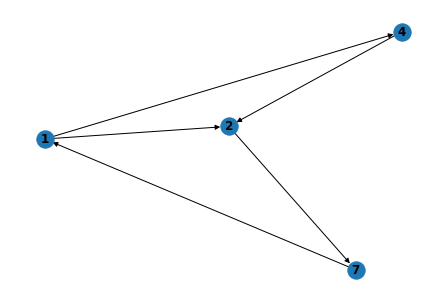

In [174]:
graph2 = Graph("1 2 1 4 4 2 2 7 7 1 0 0")

In [175]:
graph2.sumOfAllPathLengths()

1-->4:All paths are: [['1', '4']] =>min path is: ['1', '4']
So path length: 1
1-->2:All paths are: [['1', '2'], ['1', '4', '2']] =>min path is: ['1', '2']
So path length: 1
1-->7:All paths are: [['1', '2', '7'], ['1', '4', '2', '7']] =>min path is: ['1', '2', '7']
So path length: 2
4-->1:All paths are: [['4', '2', '7', '1']] =>min path is: ['4', '2', '7', '1']
So path length: 3
4-->2:All paths are: [['4', '2']] =>min path is: ['4', '2']
So path length: 1
4-->7:All paths are: [['4', '2', '7']] =>min path is: ['4', '2', '7']
So path length: 2
2-->1:All paths are: [['2', '7', '1']] =>min path is: ['2', '7', '1']
So path length: 2
2-->4:All paths are: [['2', '7', '1', '4']] =>min path is: ['2', '7', '1', '4']
So path length: 3
2-->7:All paths are: [['2', '7']] =>min path is: ['2', '7']
So path length: 1
7-->1:All paths are: [['7', '1']] =>min path is: ['7', '1']
So path length: 1
7-->4:All paths are: [['7', '1', '4']] =>min path is: ['7', '1', '4']
So path length: 2
7-->2:All paths are: [[

21

In [176]:
graph2.possiblePairesOfPages()

12

In [177]:
graph2.averagePathLength()

'1.750'